# TP3 - Loi de Fourier de la diffusion de la chaleur

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

1) Si on considère un problème bidimensionnel 20x20 alors par bijection entre $(n_x, n_y)$ et l on a l qui varie entre 0 et $20^2 = 400$.

La matrice A comporte alors $400^2 = 160000$ éléments.

La diagonale écartée de m éléments de la diagonal centrale d'une matrice carré nxn possède n-m element. Notre matrice possede donc $n + 2 x \left( n - 1 + n - n_x \right)$ avec $n = 400$ et $n_x = 20$.

On a donc $400 + 2 x \left( 400 - 1 + 400 - 20 \right) = 1958$ éléments non nuls, et donc $160000 - 1958 = 158042$ éléments nuls.

2) On ecrit tout d'abord une fonction qui retourne la matrice A sous la forme D + U + L en fonction de la constante $a = \frac {k} {\delta^2}$.

In [2]:
def matriceA_DUL(nx, ny, a):
    D = np.eye(nx*ny) * 4 * a # matrice diagonal
    
    L = np.zeros((nx*ny, nx*ny)) # matrice inferrieur
    for i in range(1, nx*ny):
        L[i, i - 1] = -a # sous-diagonale ecarté de 1
        
        if i >= nx:
            L[i, i - nx] = -a # sous-diagonale ecarté de nx
    
    return D, L.T, L

On ecrit maintenant la methode iterative qui prend les matrice D, U et L, le vecteur b, la valeur seuil $\epsilon$ de l'ecart $ max_{i, j} \left| x^{\left[ n \right] }_{i, j} - x^{\left[ n + 1 \right] }_{i, j} \right|$ (et optionelement le nombre d'iterations maximal $N_{max}$ ) et retourne une estimation du resultat selon la methode de Gauss-Seidel

In [3]:
def Gauss(D, U, L, b, eps, Nmax=1000):
    x = np.random.rand(len(D)) # solution provisoire
    xp = np.zeros(len(D)) # solution à l'etape n + 1
    
    M = D + L # la matrice triangulaire
    Mi = la.solve_triangular(M, np.identity(len(D)), lower=True) # son inverse
    
    for i in range(Nmax):
        y = -U @ x + b # membre de droite
        xp = Mi @ y # solution de M @ xp = y
        
        if max(np.abs(xp - x)) <= eps: # condition de convergence
            return xp
        
        x = np.copy(xp) # assigner x à xp
    
    raise ValueError(f'no convergence after Nmax={ Nmax } iteration') # erreur en cas de non-convergence

def Gauss_stupid(D, U, L, b, eps, Nmax=1000): # meme fonction mais qui n'utilise pas numpy.linalg
    x = np.random.rand(len(D)) # solution provisoire
    xp = np.zeros(len(D)) # solution à l'etape n + 1
    
    M = D + L # la matrice triangulaire
    for _ in range(Nmax):
        y = -U @ x + b # membre de droite
        
        for i in range(len(D)): # resolution de M @ xp = y
            if M[i, i] == 0: # evite un probleme quand M[i, i] = 0
                xp[i] = 0
            else:
                xp[i] = (y[i] - sum(M[i, :i] * x[:i])) / M[i, i]
        
        if max(np.abs(xp - x)) <= eps: # condition de convergence
            return xp
        
        x = np.copy(xp) # assigner x à xp
    
    raise ValueError(f'no convergence after Nmax={ Nmax } iteration') # erreur en cas de non-convergence

On ecrit une fonction qui prend $n_x$ et $n_y$ et retourne une matrice Q comme demandé.

On prend $ l = i + n_x*j $ et non $ l = i + \left( n_x + 1 \right)*j $ car i varie entre 0 et $n_x - 1$ et non 1 et $n_x$.

In [4]:
def matriceQex(nx, ny):
    Q = np.zeros(nx*ny)
    for j in range(ny):
        Q[nx*j] = 300 # x = 0
        Q[nx - 1 + nx*j] = 300 # x = L
    
    for i in range(nx):
        Q[i] = 400 # y = 0
        Q[i + nx*(ny - 1)] = 400 # y = L
    
    return Q

On ecrit aussi une fonction qui prend un vecteur sous cette forme et les dimenssions du probleme $n_x$ et $n_y$ et le represente alors sous forme d'une matrice.

In [5]:
def draw(X, nx, ny):
    X2d = np.zeros((ny, nx))
    for i in range(nx):
        for j in range(ny):
            X2d[j, i] = X[i + nx*j]
    
    return X2d

4) On test alors cette methode pour $n_x = n_y = 20$

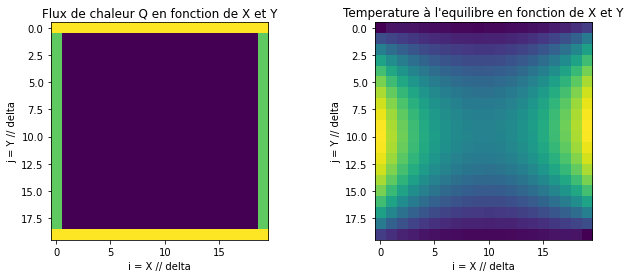

In [6]:
plt.subplot(1, 2, 1)

Q = matriceQex(20, 20)

plt.title("Flux de chaleur Q en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(Q, 20, 20))

plt.subplot(1, 2, 2)

D, U, L = matriceA_DUL(20, 20, 20*20)
T = Gauss(D, U, L, Q, 1e-3, 10000)

plt.title("Temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(T, 20, 20))

plt.subplots_adjust(right=1.5)
plt.show()

5) On test maintenant cette methode pour $n_x = n_y = 40$

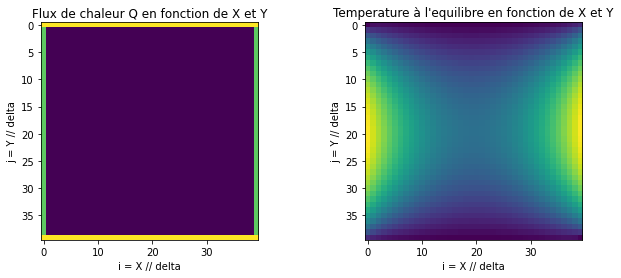

In [7]:
plt.subplot(1, 2, 1)

Q = matriceQex(40, 40)

plt.title("Flux de chaleur Q en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(Q, 40, 40))

plt.subplot(1, 2, 2)

D, U, L = matriceA_DUL(40, 40, 40*40)
T = Gauss(D, U, L, Q, 1e-3, 10000)

plt.title("Temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(T, 40, 40))

plt.subplots_adjust(right=1.5)
plt.show()

6) On trace maintenant ce gradient pour les valeurs precedentes :

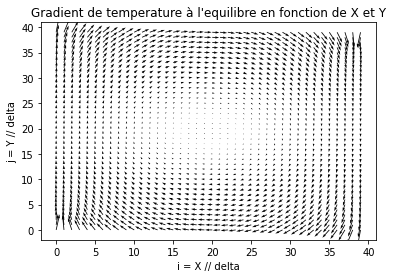

In [8]:
plt.title("Gradient de temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.quiver(*np.gradient(draw(T, 40, 40).T))
plt.show()

Ce gradient semble étrange en vu de l'alure de T (ce serait le gradient d'un rotationel, alors que ici à l'inverse on à unse symetrie autour de Y = 1/2 et X = 1/2)

7) On definie une nouvelle fonction retournant le flux de chaleur qui ajoute à un flux de chaleur existant Q un valeur q en x, y

In [9]:
def addQ(Q, x, y, q, nx, ny):
    i = int(x * nx)
    j = int(y * nx)
    Q[i + nx*j] = q

On test donc avec $n_x = n_y = 20$

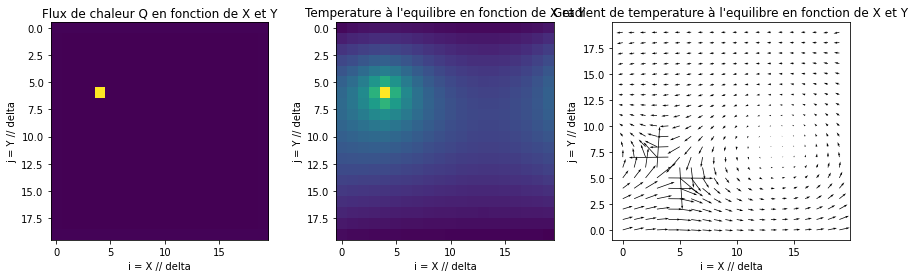

In [10]:
plt.subplot(1, 3, 1)

Q = matriceQex(20, 20)
addQ(Q, 0.2, 0.3, 5e4, 20, 20)

plt.title("Flux de chaleur Q en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(Q, 20, 20))

plt.subplot(1, 3, 2)

D, U, L = matriceA_DUL(20, 20, 20*20)
T = Gauss(D, U, L, Q, 1e-3, 10000)

plt.title("Temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(T, 20, 20))

plt.subplot(1, 3, 3)

plt.title("Gradient de temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.quiver(*np.gradient(draw(T, 20, 20)))

plt.subplots_adjust(right=2)
plt.show()

8) On essaie maintenant avec $n_x = n_y = 40$

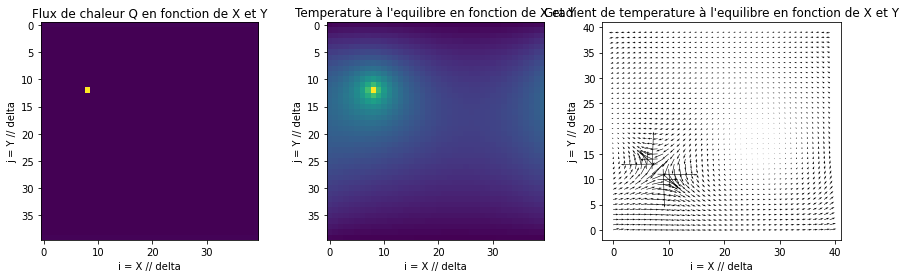

In [11]:
plt.subplot(1, 3, 1)

Q = matriceQex(40, 40)
addQ(Q, 0.2, 0.3, 5e4, 40, 40)

plt.title("Flux de chaleur Q en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(Q, 40, 40))

plt.subplot(1, 3, 2)

D, U, L = matriceA_DUL(40, 40, 40*40)
T = Gauss(D, U, L, Q, 1e-3, 10000)

plt.title("Temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(T, 40, 40))

plt.subplot(1, 3, 3)

plt.title("Gradient de temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.quiver(*np.gradient(draw(T, 40, 40)))

plt.subplots_adjust(right=2)
plt.show()

Le profile de chaleur est legerement plus "etalé" et atteint un maximum moins intense.

Ceci parait coherent car le probleme n'est pas similaire puisque la source de chaleur considérer est 4 fois plus petite lorsque on augmente la resolution.

9) On doit maintenant ecrire une fonction qui genere la matrice A sous la forme D + U + L en fonction d'une matrice de conductivité k

In [12]:
def matriceA_DUL_k(k):
    ny, nx = k.shape
    a = nx*ny*k # matrice analogue à la constante a
    
    D = np.zeros((nx*ny, nx*ny)) # matrice diagonal
    L = np.zeros((nx*ny, nx*ny)) # matrice inferrieur
    
    for i in range(0, nx):
        for j in range(0, ny):
            l = i + nx*j
            D[l, l] = 4*a[j, i]
            
            if l >= 1:
                L[l, l - 1] = -a[j, i]
            
            if l >= nx:
                L[l, l - nx] = -a[j, i]
    
    return D, L.T, L

On doit maintenant ecrire une fonction creant la matrice k et Q du probleme à un trou au centre du carré.

In [13]:
def probleme1(nx, ny, r):
    k = np.ones((ny, nx)) # matrice k
    Q = np.zeros((nx*ny)) # matrice Q
    
    for i in range(nx):
        for j in range(ny):
            if (i - nx / 2)**2 + (j - ny / 2)**2 <= r**2:
                k[j, i] = 0
                Q[i + nx*j] = 400
    
    for j in range(ny):
        Q[nx*j] = 300 # x = 0
        Q[nx - 1 + nx*j] = 300 # x = L
    
    for i in range(nx):
        Q[i] = 300 # y = 0
        Q[i + nx*(ny - 1)] = 300 # y = L
    
    return Q, k

On trace mantenant la solution pour $n_x = n_y = 30$ (pour limiter le temps de calcul) et $r = 10$

On utilisera la methode de gauss codé sans numpy.linalg car elle est capable d'eviter le probleme causer par une valeur nul sur la diagonal.

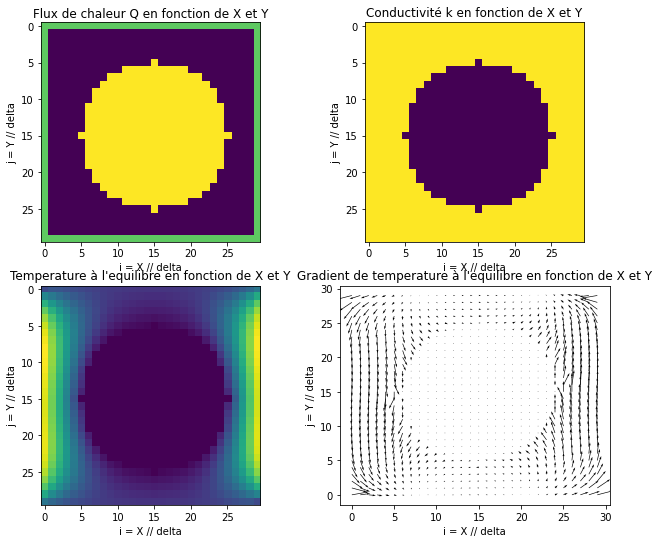

In [14]:
plt.subplot(2, 2, 1)

Q, k = probleme1(30, 30, 10)

plt.title("Flux de chaleur Q en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(Q, 30, 30))

plt.subplot(2, 2, 2)

plt.title("Conductivité k en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(k)

plt.subplot(2, 2, 3)

D, U, L = matriceA_DUL_k(k)
T = Gauss_stupid(D, U, L, Q, 1e-3, 10000)

plt.title("Temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(T, 30, 30))

plt.subplot(2, 2, 4)

plt.title("Gradient de temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.quiver(*np.gradient(draw(T, 30, 30)))

plt.subplots_adjust(right=1.5, top=1.8)
plt.show()

Il semble etrange que la solution ne soit pas invariante pas une rotation de 90°.

Ce probleme peut etre du à un effet de bord causé par la coordonée l; la matrice A a ces diagonal exteieur "tronqué" et donc les point proche d'un bord peuvent admettre une dérivée dans une direction mais pas une autre.

10) On doit maintenant ecrire une fonction creant la matrice k et Q du probleme à deux trous dans un rectangle qui prend les temperature T1 et T2 des deux trous.

In [20]:
def probleme2(nx, ny, r, T1, T2):
    k = np.ones((ny, nx)) # matrice k
    Q = np.zeros((nx*ny)) # matrice Q
    
    for i in range(nx):
        for j in range(ny):
            if (i - nx / 2)**2 + (j - ny / 4)**2 <= r**2:
                k[j, i] = 0 # premier trou
                k[j + ny//2, i] = 0 # second trou
                
                Q[i + nx*j] = T1 # premier trou
                Q[i + nx*(j + ny//2)] = T2 # second trou
    
    for j in range(ny):
        Q[nx*j] = 300 # x = 0
        Q[nx - 1 + nx*j] = 300 # x = L
    
    for i in range(nx):
        Q[i] = 300 # y = 0
        Q[i + nx*(ny - 1)] = 300 # y = L
    
    return Q, k

On trace mantenant la solution pour  $n_y = 2n_x = 40$, $r=7$ et T1 = 200 et T2 = 400

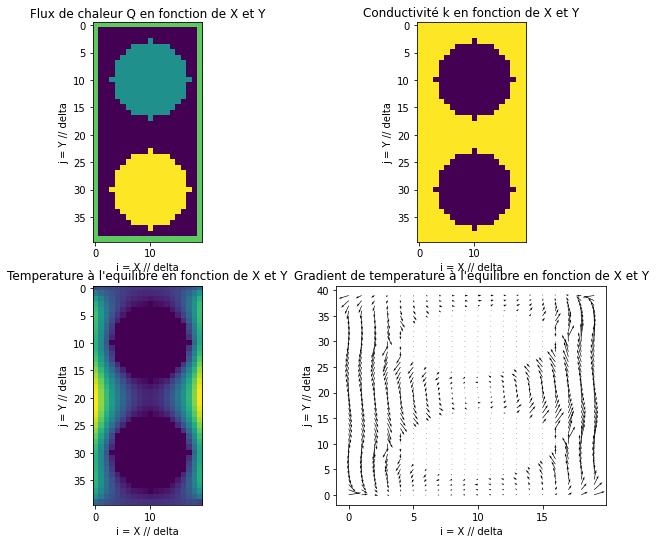

In [21]:
plt.subplot(2, 2, 1)

Q, k = probleme2(20, 40, 7, 200, 400)

plt.title("Flux de chaleur Q en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(Q, 20, 40))

plt.subplot(2, 2, 2)

plt.title("Conductivité k en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(k)

plt.subplot(2, 2, 3)

D, U, L = matriceA_DUL_k(k)
T = Gauss_stupid(D, U, L, Q, 1e-3, 10000)

plt.title("Temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.imshow(draw(T, 20, 40))

plt.subplot(2, 2, 4)

plt.title("Gradient de temperature à l'equilibre en fonction de X et Y")
plt.xlabel("i = X // delta")
plt.ylabel("j = Y // delta")
plt.quiver(*np.gradient(draw(T, 20, 40)))

plt.subplots_adjust(right=1.5, top=1.8)
plt.show()